In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os
import re
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
txt_files = {}
for file in os.listdir('./'):
    if file.endswith('.txt'):
        with open(file, 'r') as f:
            txt_files[file] = f.read()

In [3]:
table = {'Algorithm': [], 'Dimensionality': [], 'Modes_explored': [], 'Time': []}

In [4]:
list(txt_files.keys())

['results_8_wide_normal.txt',
 'results_metflow_None_train.txt',
 'results_naf_fix.txt',
 'results_8_hoffman.txt',
 'results_metflow_free_train.txt',
 'results_1_wide_normal.txt']

In [5]:
for name in txt_files.keys():
    re_out = re.findall(r'dim (\d{1,3}), n_modes = (\d)[\D]{9}([\d.]*)', txt_files[name])
    for r in re_out:
        table['Algorithm'].append(name[8:-4])
        table['Dimensionality'].append(int(r[0]))
        table['Modes_explored'].append(int(r[1]))
        t = None if r[2]=='' else float(r[2])
        table['Time'].append(t)

In [6]:
df = pd.DataFrame(table)
df.sample(10)

,Algorithm,Dimensionality,Modes_explored,Time
89,naf_fix,50,1,558.261460
105,8_hoffman,3,6,660.749516
173,1_wide_normal,50,1,228.141694
23,8_wide_normal,7,7,450.899490
80,naf_fix,10,1,364.754767
165,1_wide_normal,20,1,196.535892
60,metflow_None_train,20,1,687.570336
169,1_wide_normal,5,3,140.634626
45,metflow_None_train,10,3,666.973887
171,1_wide_normal,10,1,174.472491


In [7]:
df.Algorithm.unique()

array(['8_wide_normal', 'metflow_None_train', 'naf_fix', '8_hoffman',
       'metflow_free_train', '1_wide_normal'], dtype=object)

In [8]:
subst = {'8_wide_normal': "8 NUTS chains, wide prior",
        'metflow_None_train': "Metflow, deterministic",
         '8_hoffman': "8 NUTS chains, Hoffman-like prior",
        'metflow_free_train': "Metflow, random",
        '1_wide_normal': "1 NUTS chain, wide prior",
        'naf_fix': "NAF"}

In [9]:
df = df.replace(subst)

In [10]:
grouped = df.groupby(['Algorithm', 'Dimensionality'])[['Modes_explored']]

In [11]:
groups = dict(list(grouped))
groups.keys()

dict_keys([('1 NUTS chain, wide prior', 3), ('1 NUTS chain, wide prior', 5), ('1 NUTS chain, wide prior', 7), ('1 NUTS chain, wide prior', 10), ('1 NUTS chain, wide prior', 20), ('1 NUTS chain, wide prior', 50), ('1 NUTS chain, wide prior', 100), ('8 NUTS chains, Hoffman-like prior', 3), ('8 NUTS chains, Hoffman-like prior', 5), ('8 NUTS chains, Hoffman-like prior', 7), ('8 NUTS chains, Hoffman-like prior', 10), ('8 NUTS chains, Hoffman-like prior', 20), ('8 NUTS chains, Hoffman-like prior', 50), ('8 NUTS chains, Hoffman-like prior', 100), ('8 NUTS chains, wide prior', 3), ('8 NUTS chains, wide prior', 5), ('8 NUTS chains, wide prior', 7), ('8 NUTS chains, wide prior', 10), ('8 NUTS chains, wide prior', 20), ('8 NUTS chains, wide prior', 50), ('8 NUTS chains, wide prior', 100), ('Metflow, deterministic', 3), ('Metflow, deterministic', 5), ('Metflow, deterministic', 7), ('Metflow, deterministic', 10), ('Metflow, deterministic', 20), ('Metflow, deterministic', 50), ('Metflow, determinist

In [12]:
table_to_plot = {'Algorithm': [], 'Dimensionality': [], 'Mean_modes': [], 'Std_modes': [], 'Mean_time': [], 'Std_time': []}

In [13]:
for gr in groups.keys():
    table_to_plot['Algorithm'].append(gr[0])
    table_to_plot['Dimensionality'].append(gr[1])
    table_to_plot['Mean_modes'].append(groups[gr].Modes_explored.mean())
    table_to_plot['Std_modes'].append(groups[gr].Modes_explored.std())
    table_to_plot['Mean_time'].append(groups[gr].Time.mean())
    table_to_plot['Std_time'].append(groups[gr].Time.std())
table_to_plot = pd.DataFrame(table_to_plot)

In [14]:
table_to_plot.fillna(0., inplace=True)
table_to_plot

,Algorithm,Dimensionality,Mean_modes,Std_modes,Mean_time,Std_time
0,"1 NUTS chain, wide prior",3,3.40,1.341641,167.538578,29.963321
1,"1 NUTS chain, wide prior",5,2.40,0.547723,196.513177,61.910185
2,"1 NUTS chain, wide prior",7,1.20,0.447214,147.390939,5.817569
3,"1 NUTS chain, wide prior",10,1.00,0.000000,172.818080,2.020921
4,"1 NUTS chain, wide prior",20,1.00,0.000000,198.966873,1.840148
5,"1 NUTS chain, wide prior",50,1.00,0.000000,228.720550,0.668997
6,"1 NUTS chain, wide prior",100,1.00,0.000000,391.751944,129.512832
7,"8 NUTS chains, Hoffman-like prior",3,6.00,0.707107,630.240032,51.903521
8,"8 NUTS chains, Hoffman-like prior",5,4.20,1.643168,703.572405,50.614792
9,"8 NUTS chains, Hoffman-like prior",7,2.00,1.000000,624.537534,64.616839


In [15]:
for gr in groups.keys():
    print(gr)

('1 NUTS chain, wide prior', 3)
('1 NUTS chain, wide prior', 5)
('1 NUTS chain, wide prior', 7)
('1 NUTS chain, wide prior', 10)
('1 NUTS chain, wide prior', 20)
('1 NUTS chain, wide prior', 50)
('1 NUTS chain, wide prior', 100)
('8 NUTS chains, Hoffman-like prior', 3)
('8 NUTS chains, Hoffman-like prior', 5)
('8 NUTS chains, Hoffman-like prior', 7)
('8 NUTS chains, Hoffman-like prior', 10)
('8 NUTS chains, Hoffman-like prior', 20)
('8 NUTS chains, Hoffman-like prior', 50)
('8 NUTS chains, Hoffman-like prior', 100)
('8 NUTS chains, wide prior', 3)
('8 NUTS chains, wide prior', 5)
('8 NUTS chains, wide prior', 7)
('8 NUTS chains, wide prior', 10)
('8 NUTS chains, wide prior', 20)
('8 NUTS chains, wide prior', 50)
('8 NUTS chains, wide prior', 100)
('Metflow, deterministic', 3)
('Metflow, deterministic', 5)
('Metflow, deterministic', 7)
('Metflow, deterministic', 10)
('Metflow, deterministic', 20)
('Metflow, deterministic', 50)
('Metflow, deterministic', 100)
('Metflow, random', 3)
('Met

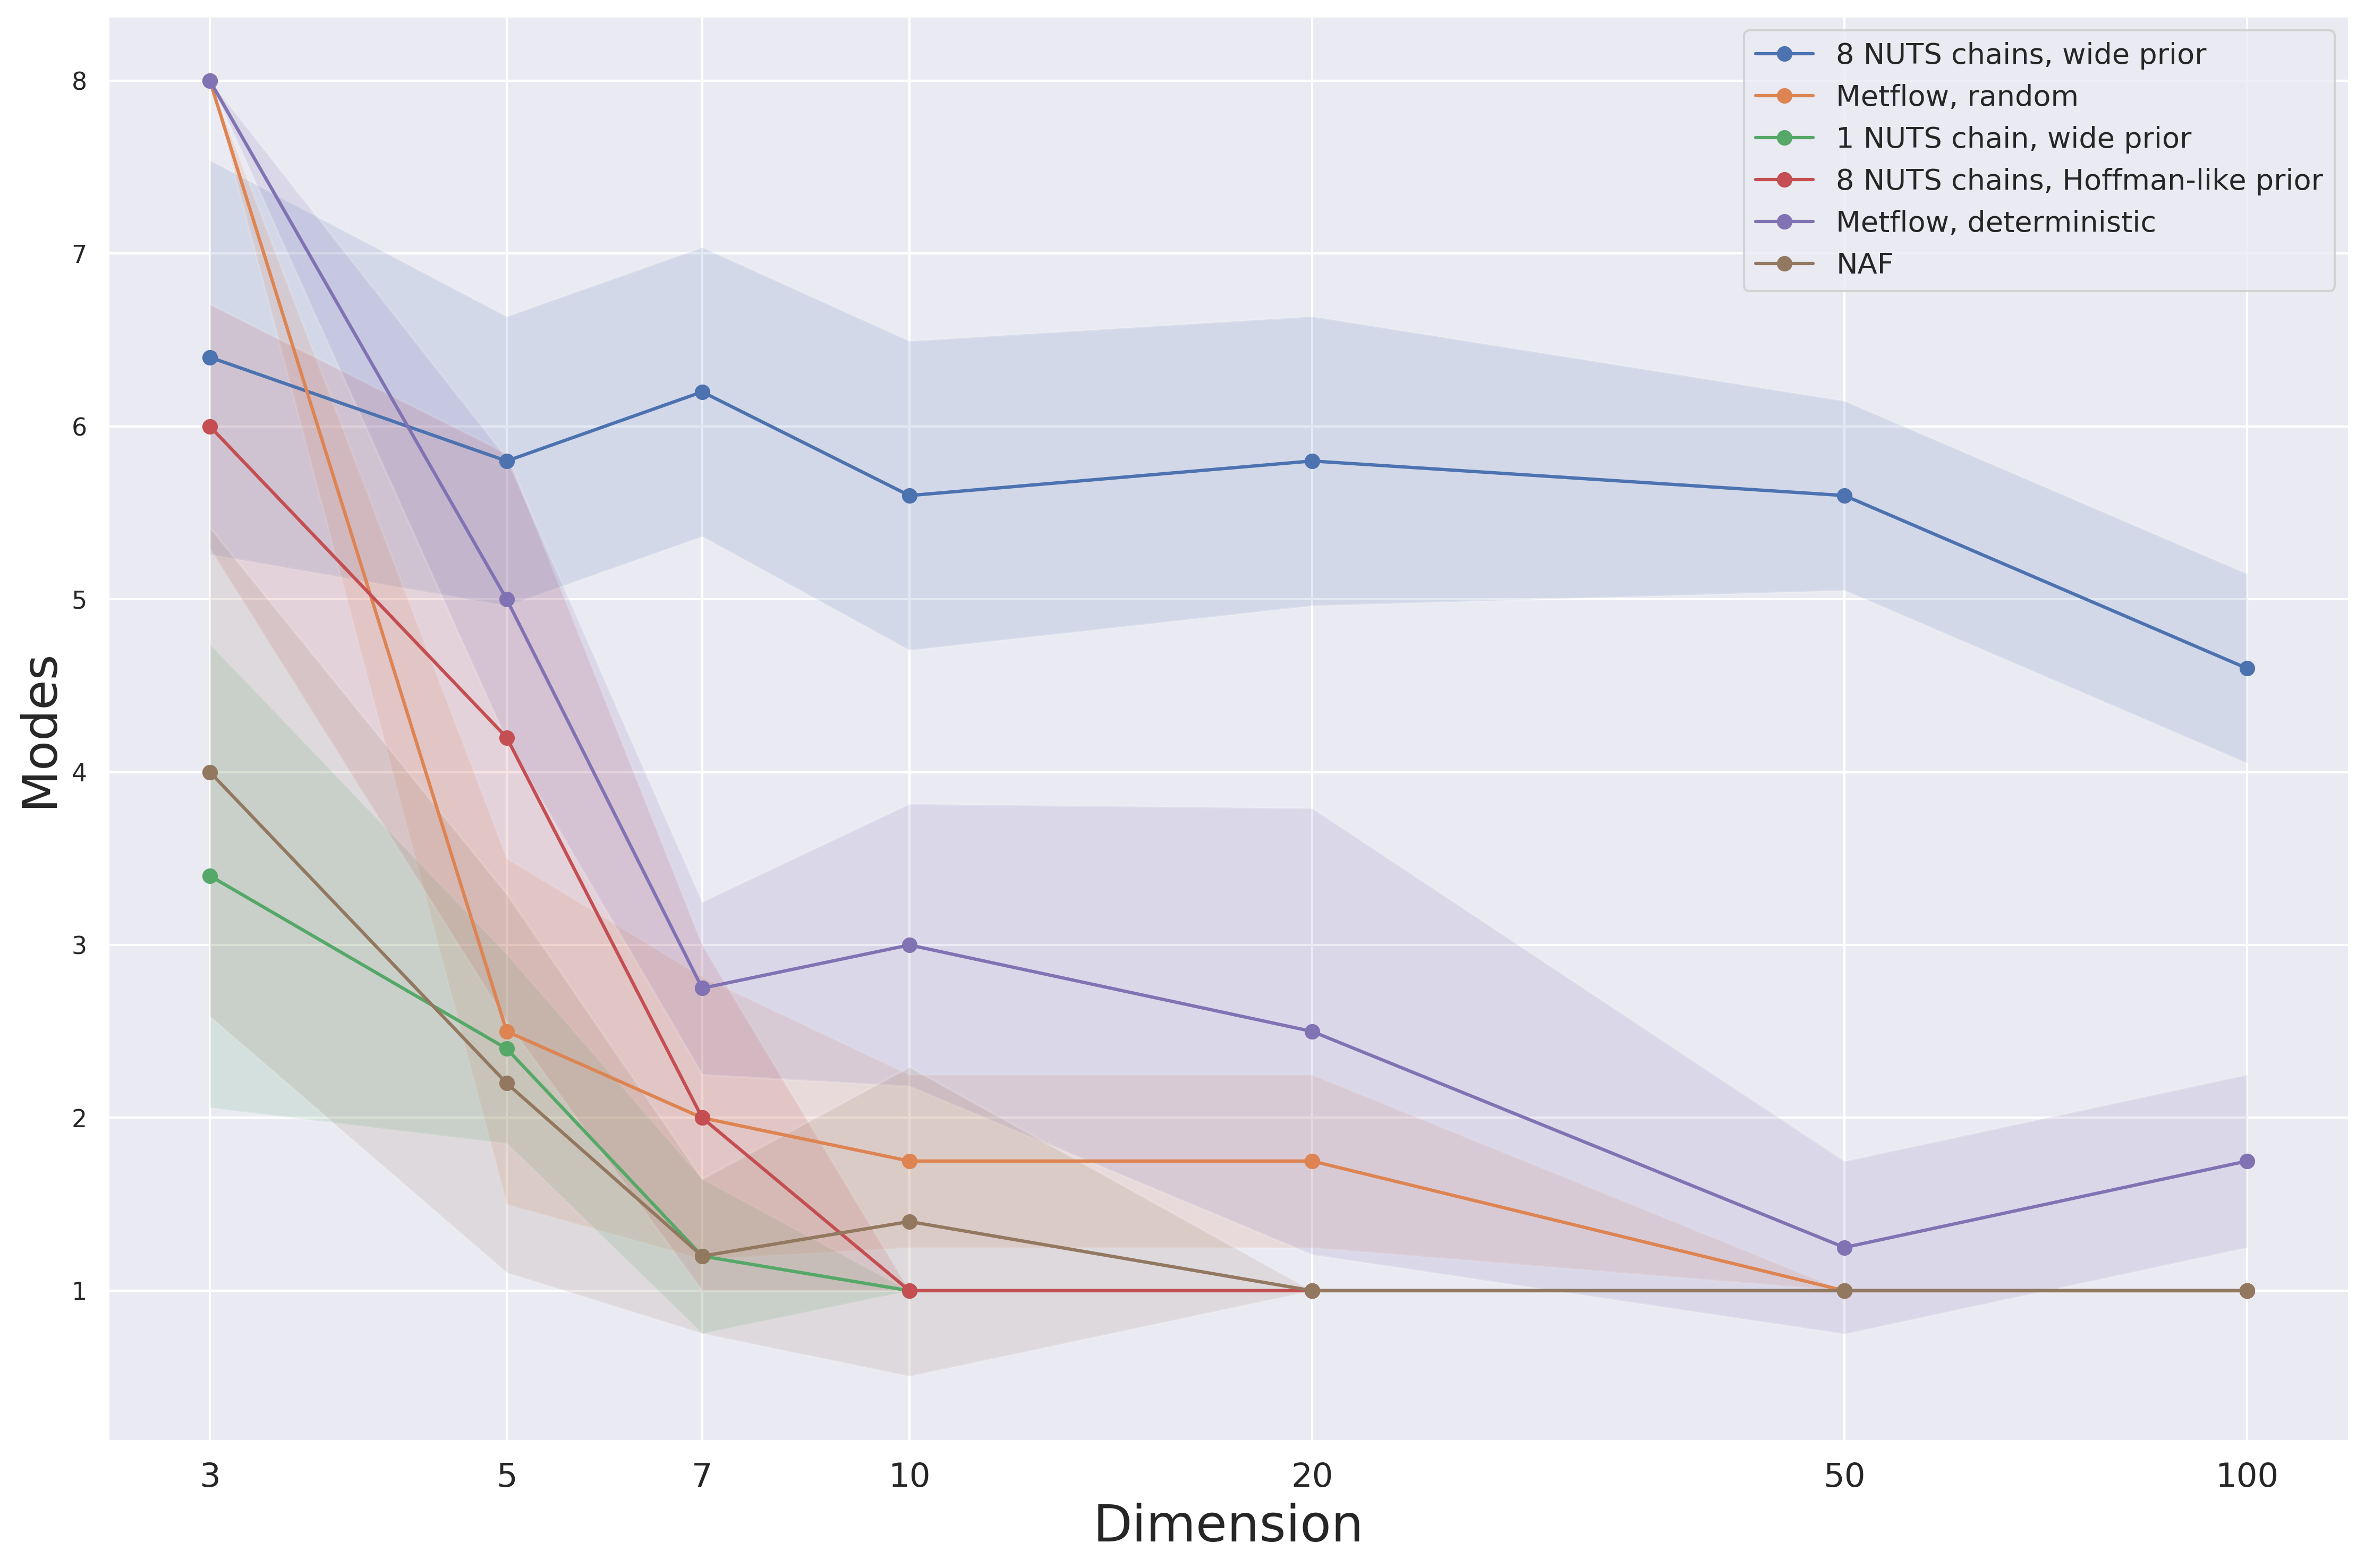

In [16]:
plt.figure(figsize=(15, 10), dpi=300)
dims = [3, 5, 7, 10, 20, 50, 100]
x = np.log(dims)
for alg in list(set(table_to_plot.Algorithm)):
    len_current = table_to_plot[table_to_plot.Algorithm == alg].Mean_modes.shape[0]
    plt.plot(x[:len_current], table_to_plot[table_to_plot.Algorithm == alg].Mean_modes,
             label=alg, marker='o')
    plt.fill_between(x[:len_current],
                     table_to_plot[table_to_plot.Algorithm == alg].Mean_modes - table_to_plot[table_to_plot.Algorithm == alg].Std_modes,
                     table_to_plot[table_to_plot.Algorithm == alg].Mean_modes + table_to_plot[table_to_plot.Algorithm == alg].Std_modes,
                     alpha=.15)
plt.xticks(x, dims, fontsize=15)
plt.yticks(1 + np.arange(8))
plt.xlabel("Dimension", fontsize=23)
plt.ylabel("Modes", fontsize=22)
plt.legend(prop={'size': 13});
plt.tight_layout()
plt.savefig('./new_s4.png', format='png', dpi=300) 

In [17]:
#table_to_plot = table_to_plot[table_to_plot.Algorithm != '1 NUTS chain, wide prior']

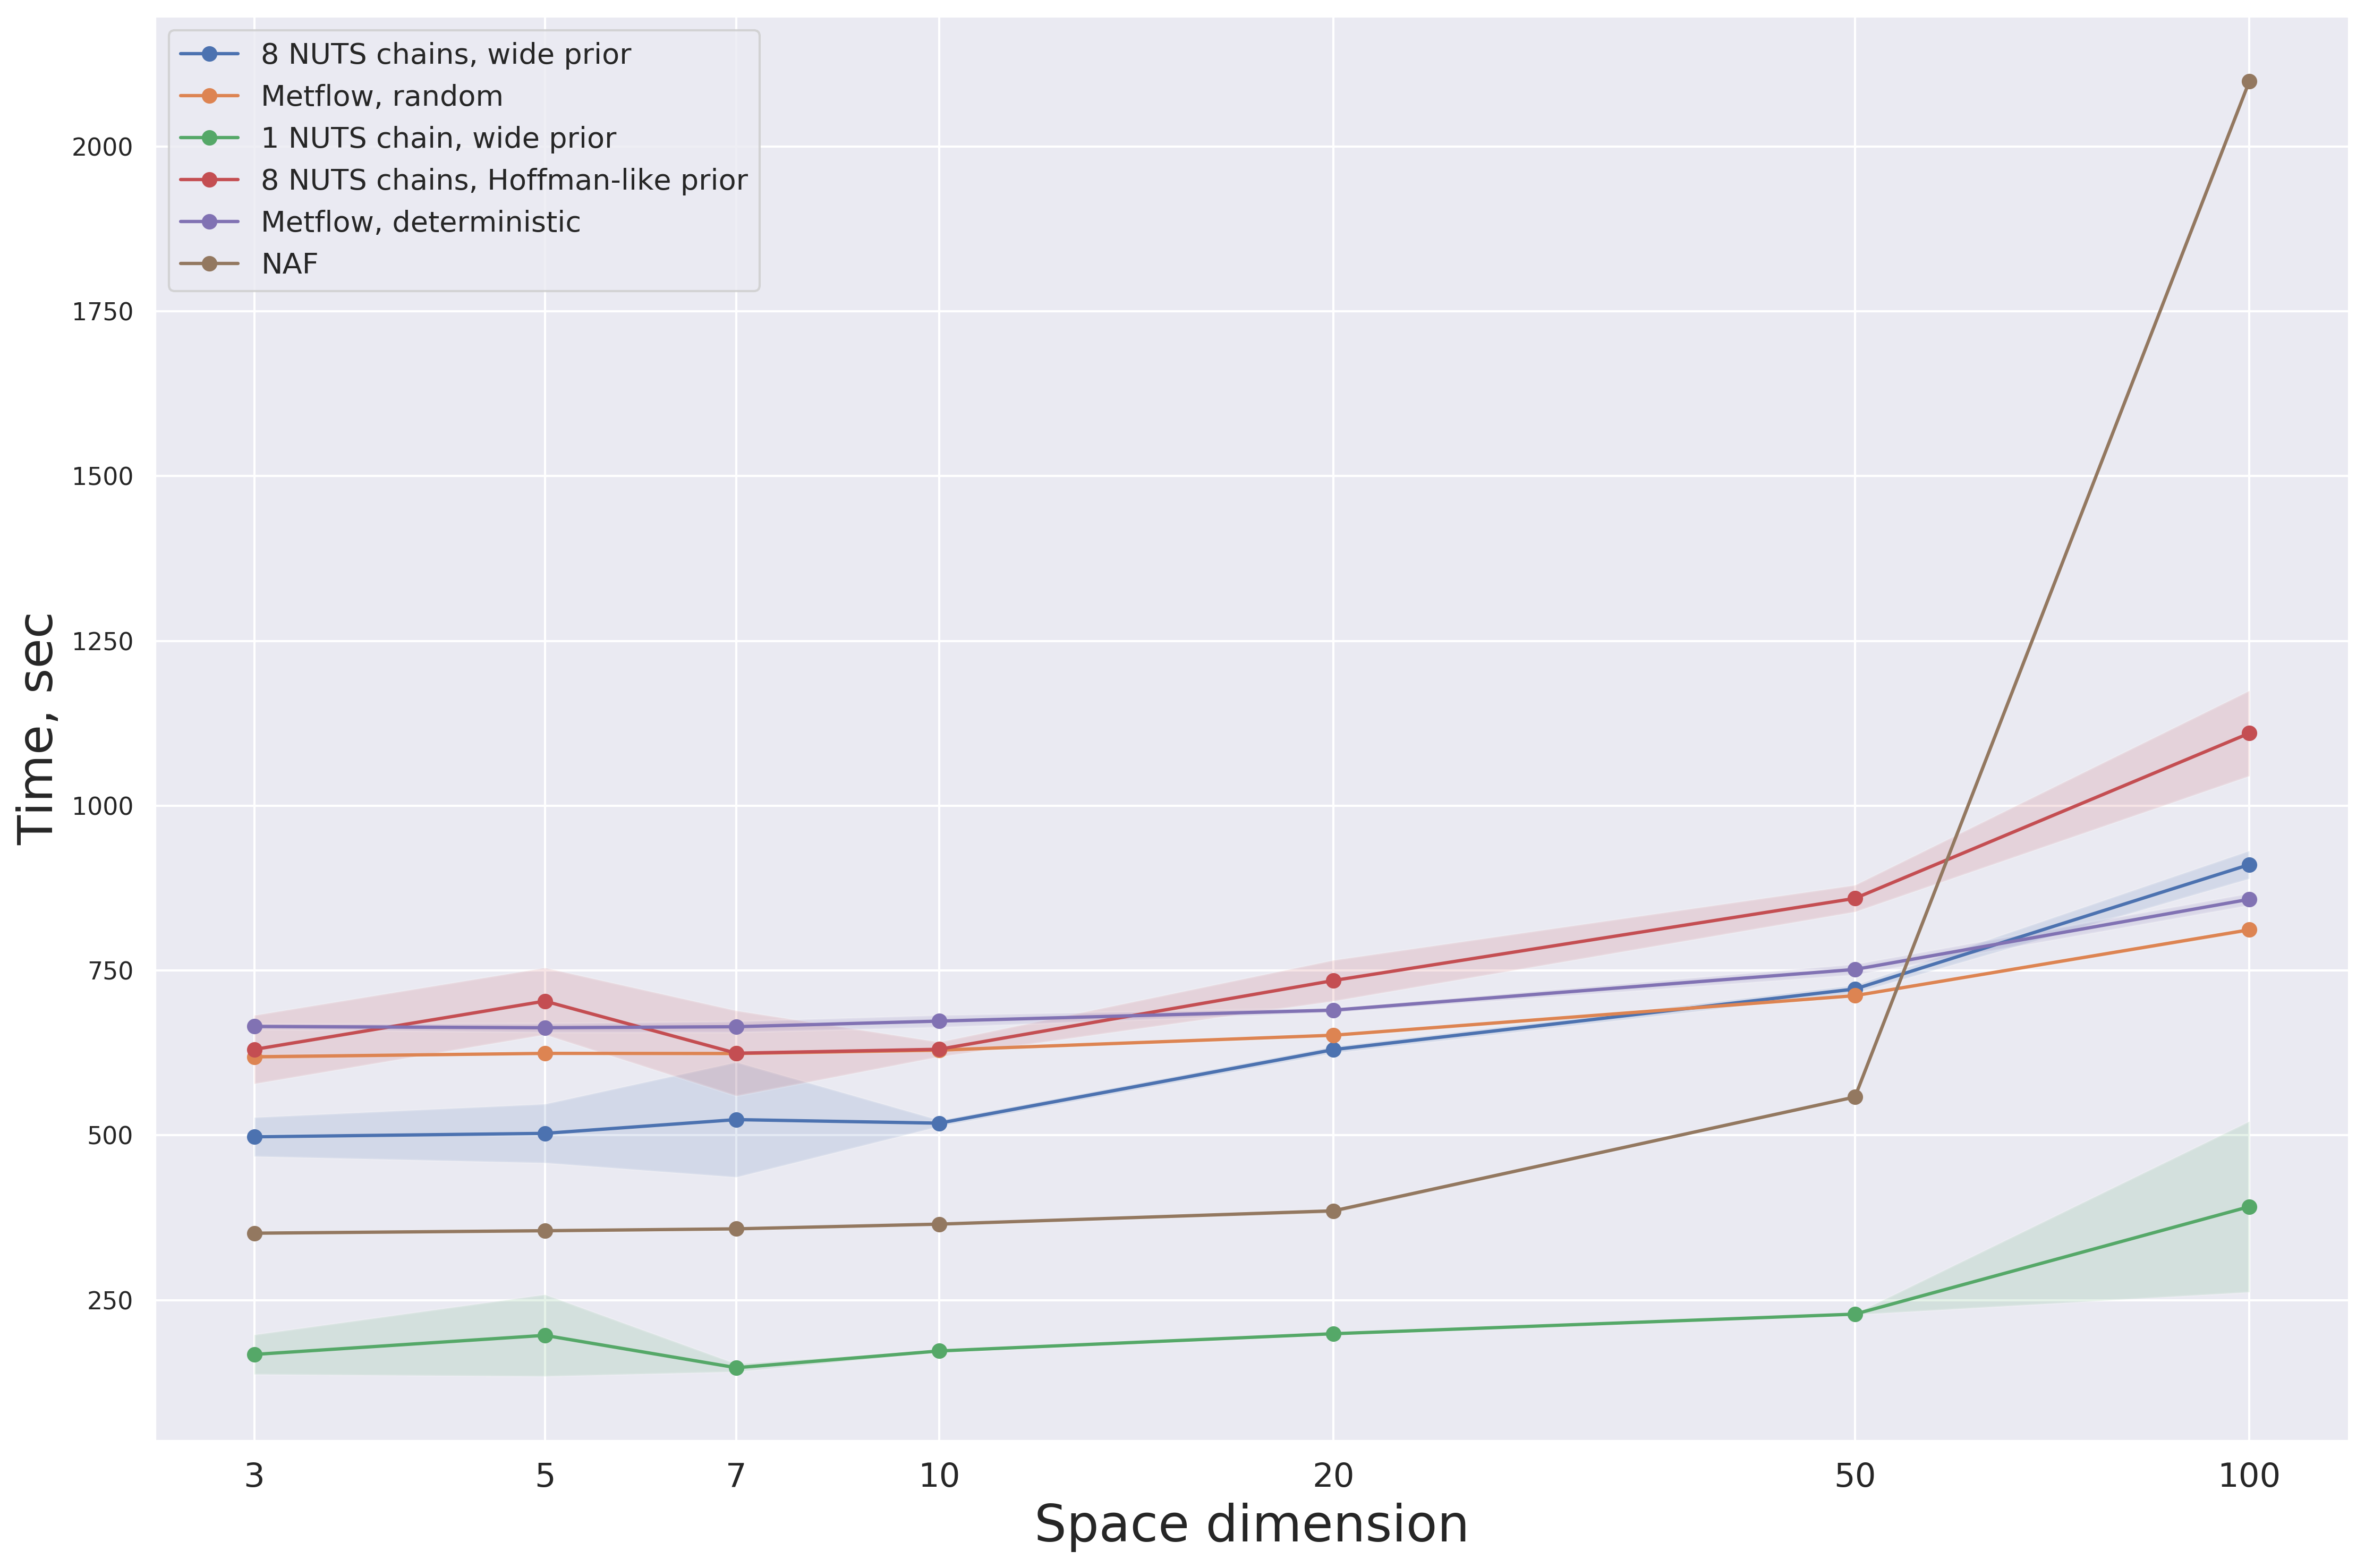

In [20]:
plt.figure(figsize=(15, 10), dpi=300)
dims = [3, 5, 7, 10, 20, 50, 100]
x = np.log(dims)
for alg in list(set(table_to_plot.Algorithm)):
    len_current = table_to_plot[table_to_plot.Algorithm == alg].Mean_time.shape[0]
    plt.plot(x[:len_current], table_to_plot[table_to_plot.Algorithm == alg].Mean_time,
             label=alg, marker='o')
    plt.fill_between(x[:len_current],
                     table_to_plot[table_to_plot.Algorithm == alg].Mean_time - table_to_plot[table_to_plot.Algorithm == alg].Std_time,
                     table_to_plot[table_to_plot.Algorithm == alg].Mean_time + table_to_plot[table_to_plot.Algorithm == alg].Std_time,
                     alpha=.15)
plt.xticks(x, dims, fontsize=15)
plt.xlabel("Space dimension", fontsize=23)
plt.ylabel("Time, sec", fontsize=22)
plt.legend(prop={'size': 13});
plt.tight_layout()
plt.savefig('./new_s4_time.png', format='png', dpi=300) 